<a href="https://colab.research.google.com/github/Sakshi-2/Accidents/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit Card Defaulters prediction

In [ ]:
import numpy as np
import pandas as pd
seed = 69 # Set the random seed for the entire document

# Linear Models, their CV and Statsmods
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy



# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

# Classifier Metrics 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score

# Pre-processing packages
from sklearn.preprocessing import StandardScaler


# CV, Gridsearch, train_test_split, model selection packages
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split


import time
import pickle

# Graph-Plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('ggplot')  # nice plots
# sns.set_style('white')
# sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})  # So that your grids have no axis

%matplotlib inline


In [ ]:
#importing dataset
url='https://raw.githubusercontent.com/Sakshi-2/Credit-card/main/default%20of%20credit%20card%20clients.csv'
df=pd.read_csv(url)

Exploratory Data Analysis

In [ ]:
df.shape

(30000, 25)

In [ ]:
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

No missing values in the data

Renaming tables so that they are easy to understand.

In [ ]:
df.rename(columns={'default payment next month':'DEFAULT','PAY_0':'PAY_1','SEX':'Gender'}, inplace=True)

In [ ]:
df.head(1)


,ID,LIMIT_BAL,Gender,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
Gender,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
# Dropping unnecessary column
df.drop(['ID'], axis=1, inplace=True)

In [ ]:
#Handling Outlier
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x
df=df.apply(outlier_capping)

Choosing some features which would be correlated.From the data provided we see that we want to predict whether a person will default in payment next month or not. 

---



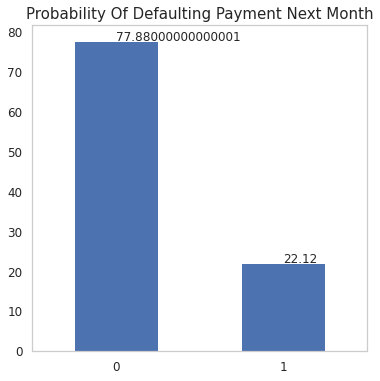

In [ ]:
def_cnt = (df.DEFAULT.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

77% Clients are not expected to default payment.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


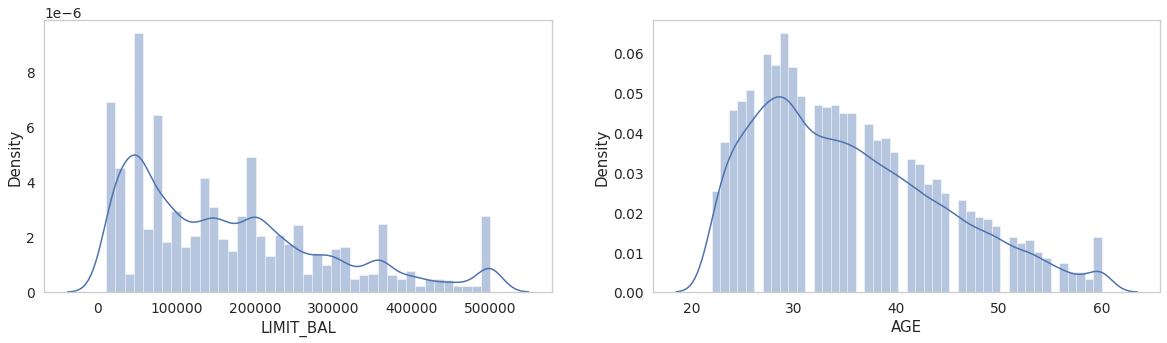

In [ ]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(df.AGE)

plt.show()


We have more number of clients having limiting balance between 0 to 200000 currency.
We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.

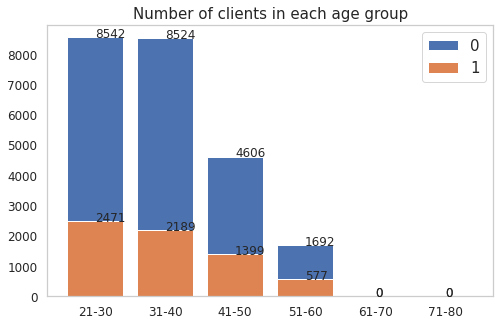

In [ ]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=bins, labels=names, right=True)

age_cnt = df.AGE_BIN.value_counts()
age_0 = (df.AGE_BIN[df['DEFAULT'] == 0].value_counts())
age_1 = (df.AGE_BIN[df['DEFAULT'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='DEFAULT', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

We have maximum clients from 21-30 age group followed by 31-40. Hence with increasing age group the number of clients that will default the payment next month is decreasing. 

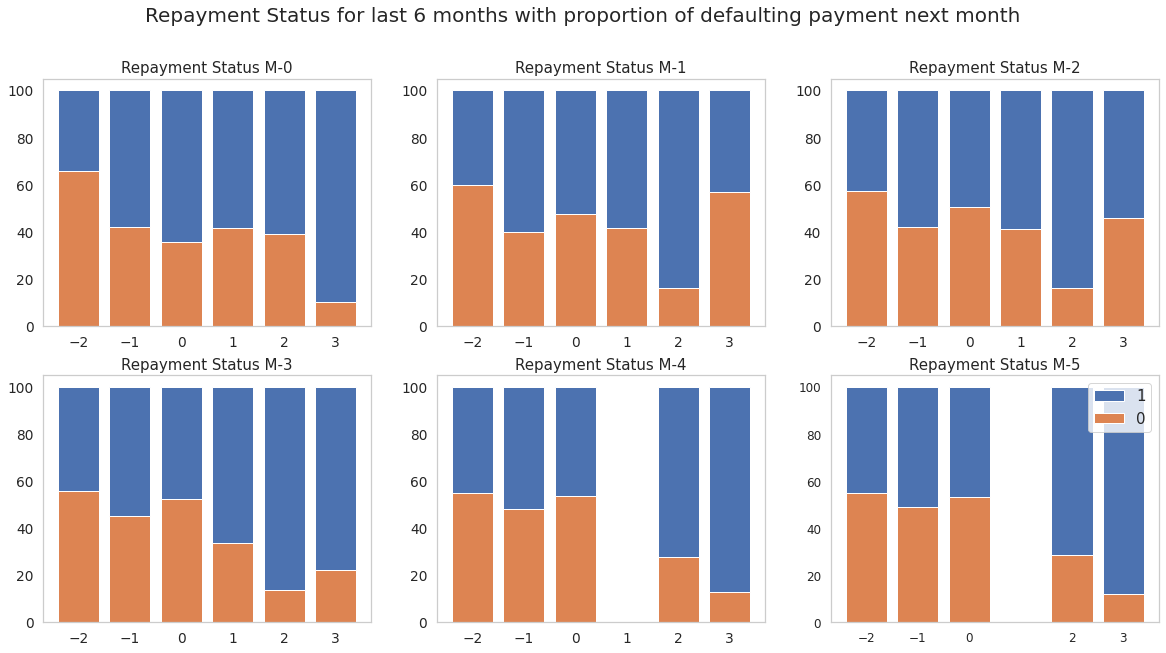

In [ ]:
plt.subplots(figsize=(20,10))

ind = sorted(df.PAY_1.unique())
pay_0 = (df.PAY_1[df['DEFAULT'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_1[df['DEFAULT'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-0", fontsize=15)

ind = sorted(df.PAY_2.unique())
pay_0 = (df.PAY_2[df['DEFAULT'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_2[df['DEFAULT'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)

ind = sorted(df.PAY_3.unique())
pay_0 = (df.PAY_3[df['DEFAULT'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_3[df['DEFAULT'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)

ind = sorted(df.PAY_4.unique())
pay_0 = (df.PAY_4[df['DEFAULT'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_4[df['DEFAULT'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)

ind = sorted(df.PAY_5.unique())
pay_0 = (df.PAY_5[df['DEFAULT'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_5[df['DEFAULT'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-4", fontsize=15)

ind = sorted(df.PAY_6.unique())
pay_0 = (df.PAY_6[df['DEFAULT'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_6[df['DEFAULT'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.show()


Above plot shows us the proportion of clients that will default payment next month based on repayment history.
For Current month status, the earlier the payment is made lesser are the chances of those clients defaulting the payment.

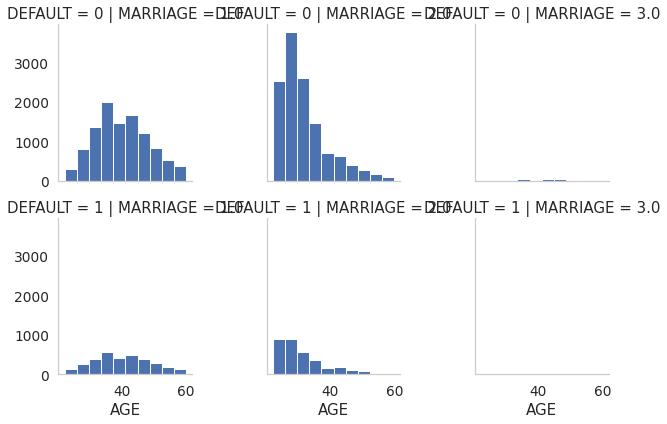

In [ ]:
g = sns.FacetGrid(df, row='DEFAULT', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

From above plot we can infer that married people between age bracket of 30 and 50 and unmarried clients of age 20-30 tend to default payment with unmarried clients higher probability to default payment. Hence we can include MARRIAGE feature of clients to find probability of defaulting the payment next month

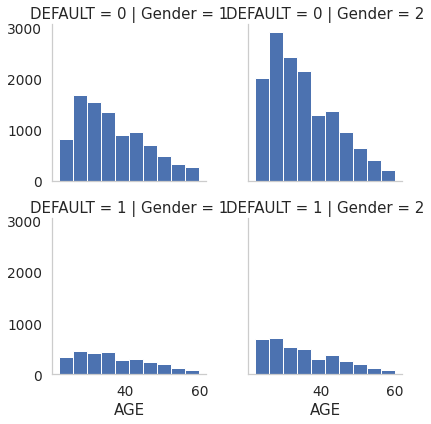

In [ ]:
g = sns.FacetGrid(df, row='DEFAULT', col='Gender')
g = g.map(plt.hist, 'AGE')

It can be seen that females of age group 20-30 have very high tendency to default payment compared to males in all age brackets. Hence we can keep the SEX column of clients to predict probability of defaulting payment.

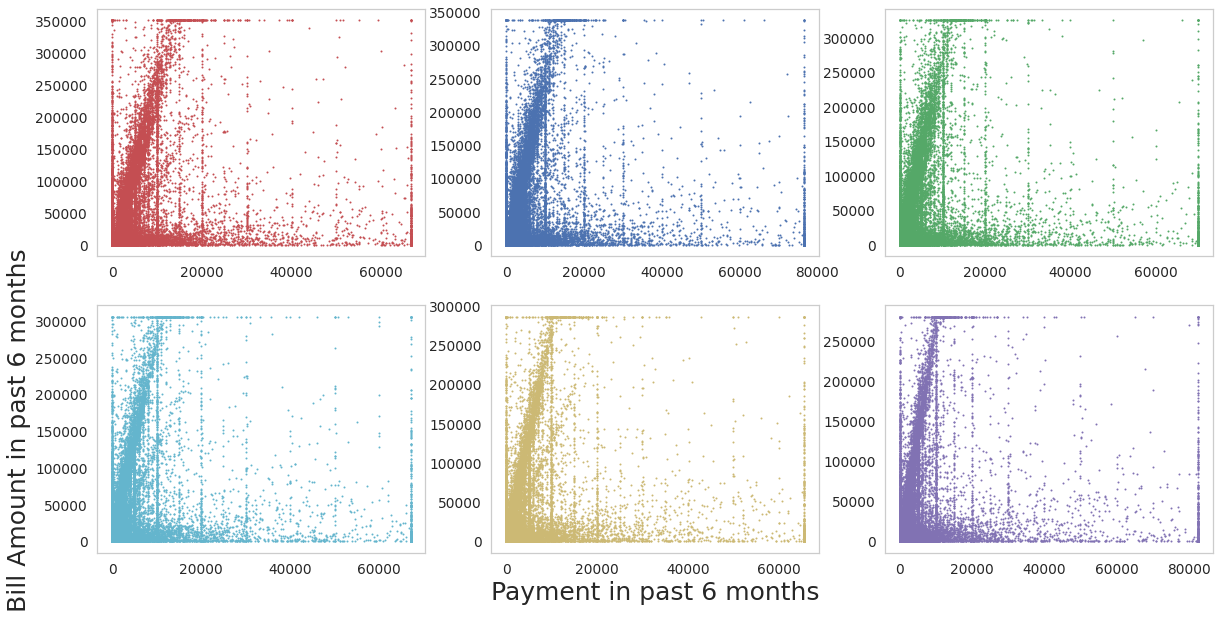

In [ ]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.show()

Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. This we can infer since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis

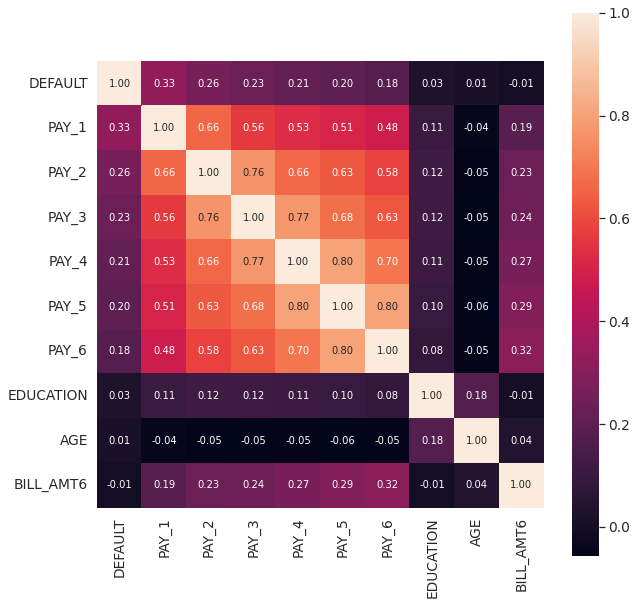

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'DEFAULT')['DEFAULT'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

As we can see that next month default prediction is dependent on repayment status of past six months of all the features given to us. But there is multicollinearity between the Repayment Status features.

In [ ]:
df.columns

Index(['LIMIT_BAL', 'Gender', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT',
       'AGE_BIN'],
      dtype='object')

In [ ]:
data=df.corr()
df_default_corrs = data.iloc[:-1,-1:]   
df_default_corrs

,DEFAULT
LIMIT_BAL,-0.154572
Gender,-0.039961
EDUCATION,0.028336
MARRIAGE,-0.025586
AGE,0.013647
PAY_1,0.328366
PAY_2,0.264478
PAY_3,0.233753
PAY_4,0.213136
PAY_5,0.199674


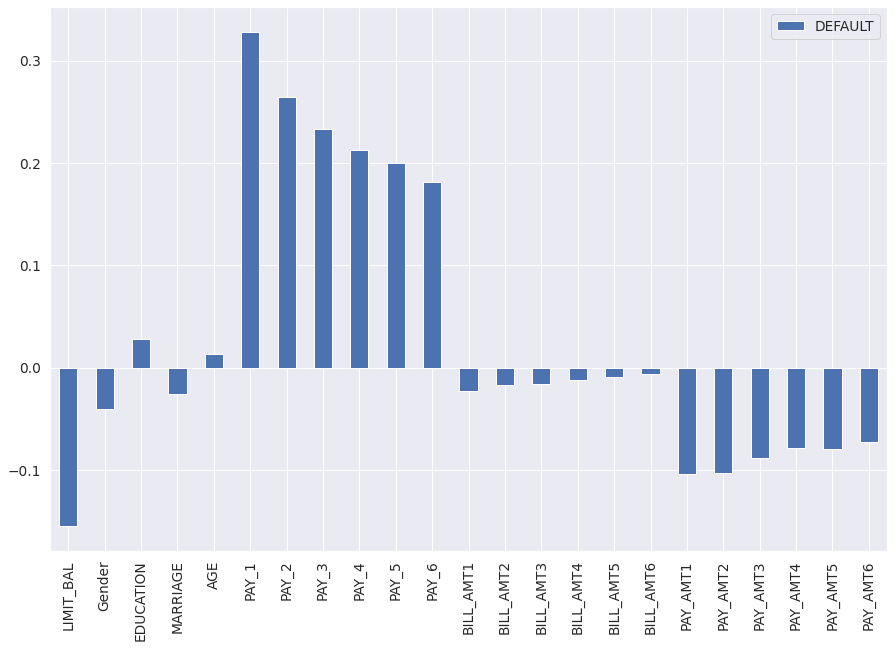

In [ ]:
df_default_corrs.plot(kind='bar',figsize=(15,10))

We can visually see that PAY_1 has the highest correlation to DEFAULT.

In [ ]:
df.loc[~(df==0).all(axis=1)]

,LIMIT_BAL,Gender,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,AGE_BIN
0,20000.0,2,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.00,689.0,0.0,0.0,0.0,0.0,1,21-30
1,120000.0,2,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3455.0,3261.0,0.00,1000.0,1000.0,1000.0,0.0,2000.0,1,21-30
2,90000.0,2,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14948.0,15549.0,1518.00,1500.0,1000.0,1000.0,1000.0,5000.0,0,31-40
3,50000.0,2,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28959.0,29547.0,2000.00,2019.0,1200.0,1100.0,1069.0,1000.0,0,31-40
4,50000.0,1,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,19146.0,19131.0,2000.00,36681.0,10000.0,9000.0,689.0,679.0,0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,31237.0,15980.0,8500.00,20000.0,5003.0,3047.0,5000.0,1000.0,0,31-40
29996,150000.0,1,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,5190.0,0.0,1837.00,3526.0,8998.0,129.0,0.0,0.0,0,41-50
29997,30000.0,1,2.0,2.0,37.0,3.0,3.0,2.0,-1.0,0.0,...,20582.0,19357.0,0.00,0.0,22000.0,4200.0,2000.0,3100.0,1,31-40
29998,80000.0,1,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,11855.0,48944.0,66522.18,3409.0,1178.0,1926.0,52964.0,1804.0,1,41-50


The pre processing for predictions

Train- test split

In [ ]:
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]
#X = preprocessing.StandardScaler().fit(X).transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24000, 24) (24000, 1)
Test set: (6000, 24) (6000, 1)


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import precision_score
precision_lr = precision_score(y_test, y_pred, average='weighted')
print(precision_lr)
from sklearn.metrics import recall_score
recall_lr = recall_score(y_test, y_pred, average='weighted')
print(recall_lr)
from sklearn.metrics import f1_score
f1_lr = f1_score(y_test, y_pred, average='weighted')
print(f1_lr)

0.3396442136782052
0.38066666666666665
0.28312362642785227


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

precision_knn = precision_score(y_test, y_pred, average='weighted')
print(precision_knn)
recall_knn = recall_score(y_test, y_pred, average='weighted')
print(recall_knn)
f1_knn = f1_score(y_test, y_pred, average='weighted')
print(f1_knn)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.3821558205318238
0.4166666666666667
0.3863499507978284


Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

precision_gnb = precision_score(y_test, y_pred, average='weighted')
print(precision_gnb)
recall_gnb = recall_score(y_test, y_pred, average='weighted')
print(recall_gnb)
f1_gnb = f1_score(y_test, y_pred, average='weighted')
print(f1_gnb)

0.758285136294725
0.7471666666666666
0.7437278661446488


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest



In [ ]:
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_depth = 10, max_features=4, n_jobs=-1)
radm_clf.fit( X_train, y_train )
y_pred= radm_clf.predict(X_test)

precision_rf = precision_score(y_test, y_pred, average='weighted')
print(precision_rf)
recall_rf = recall_score(y_test, y_pred, average='weighted')
print(recall_rf)
f1_rf = f1_score(y_test, y_pred, average='weighted')
print(f1_rf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9802433449917244
0.978
0.9768375838891689


Decision Tree

In [ ]:
clf_tree = DecisionTreeClassifier( max_depth = 3, max_features=4, criterion='gini' )
clf_tree.fit( X_train, y_train )
y_pred = clf_tree.predict(X_test)

precision_dt = precision_score(y_test, y_pred, average='weighted')
print(precision_dt)
recall_dt = recall_score(y_test, y_pred, average='weighted')
print(recall_dt)
f1_dt = f1_score(y_test, y_pred, average='weighted')
print(f1_dt)

0.37891268533851896
0.43783333333333335
0.3785926233702829


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
data = [[precision_lr,recall_lr, f1_lr],[precision_knn,recall_knn, f1_knn],[precision_gnb,recall_gnb, f1_gnb],[precision_rf,recall_rf, f1_rf],[precision_dt,recall_dt, f1_dt]]

In [ ]:
df1 = pd.DataFrame(data, columns = ['precision', 'recall','f1_score'])
df1

,precision,recall,f1_score
0,0.339644,0.380667,0.283124
1,0.382156,0.416667,0.386350
2,0.758285,0.747167,0.743728
3,0.980243,0.978000,0.976838
4,0.378913,0.437833,0.378593


We can see that random forest performs the best among all and has the highest f1 score followed by gaussian navier bayes.